# IT Academy - Data Science with Python
## S13 T01: Supervised Classification
### [Github Supervised Classification](https://github.com/jesussantana/Supervised-Classification)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Classification)

In [1]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

In [2]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Creates a new variable depending on whether the flight arrived late or not (ArrDelay> 0).

### Exercise 3: 
  - Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.

### Exercise 4: 
  - Train them using the different parameters they support.  

### Exercise 5: 
  - Compare your performance using the traint / test approach or using all data (internal validation).

### Exercise 5: 
  - Perform some variable engineering process to improve prediction.

### Exercise 6: 
  - Do not use the DepDelay variable when making predictions.

In [3]:
df = df_raw.copy()

## Exploratory analysis

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [6]:
df = df_raw.loc[:,["ArrDelay","ArrTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay", 'UniqueCarrier']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrDelay       float64
 1   ArrTime        float64
 2   Distance       int64  
 3   TaxiIn         float64
 4   TaxiOut        float64
 5   DayOfWeek      int64  
 6   DepDelay       float64
 7   CarrierDelay   float64
 8   UniqueCarrier  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 133.0+ MB


- Data sampling to reduce loading time

In [8]:
df = df.sample(frac=0.001, random_state = 6858)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.shape

(1937, 9)

In [11]:
df.isna().sum().sort_values()

Distance           0
DayOfWeek          0
DepDelay           0
UniqueCarrier      0
TaxiOut            1
ArrDelay           6
ArrTime            6
TaxiIn             6
CarrierDelay     668
dtype: int64

## Distribution of the response variable

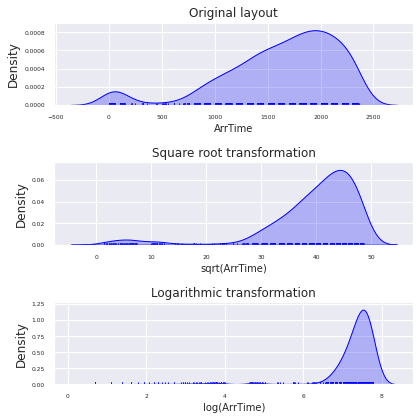

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df.ArrTime,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrTime', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrTime)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrTime)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

## Numerical variables

In [13]:
df.select_dtypes(include=['float64', 'int']).describe()

,ArrDelay,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay
count,1931.000000,1931.000000,1937.000000,1931.000000,1936.000000,1937.000000,1937.000000,1269.000000
mean,42.473848,1619.844640,749.701600,6.686173,18.018595,3.979350,43.697470,18.381403
std,56.640112,549.546968,569.053389,4.469692,13.465994,1.954701,53.677347,42.626851
min,-25.000000,2.000000,45.000000,1.000000,1.000000,1.000000,6.000000,0.000000
25%,9.000000,1334.000000,334.000000,4.000000,10.000000,2.000000,12.000000,0.000000
50%,24.000000,1730.000000,594.000000,6.000000,14.000000,4.000000,24.000000,1.000000
75%,55.000000,2029.500000,984.000000,8.000000,21.000000,5.000000,53.000000,19.000000
max,569.000000,2359.000000,3329.000000,44.000000,137.000000,7.000000,571.000000,569.000000


Text(0.5, 0.98, 'Distribution Numerical Variable')

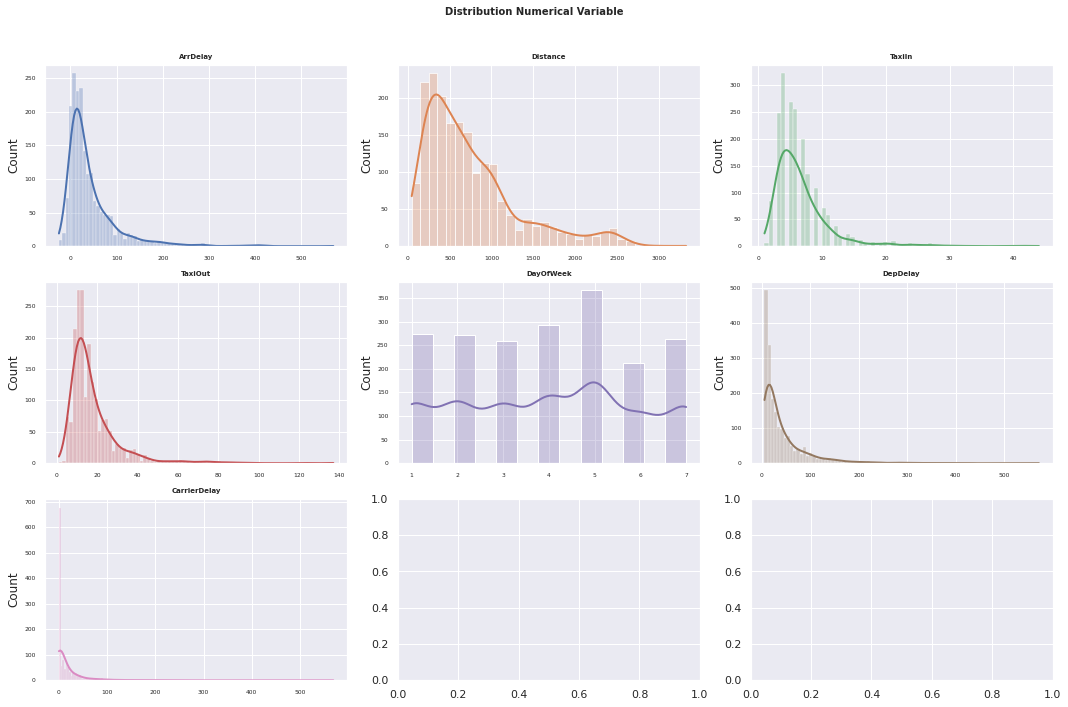

In [14]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")

Text(0.5, 0.98, 'Correlación con ArrTime')

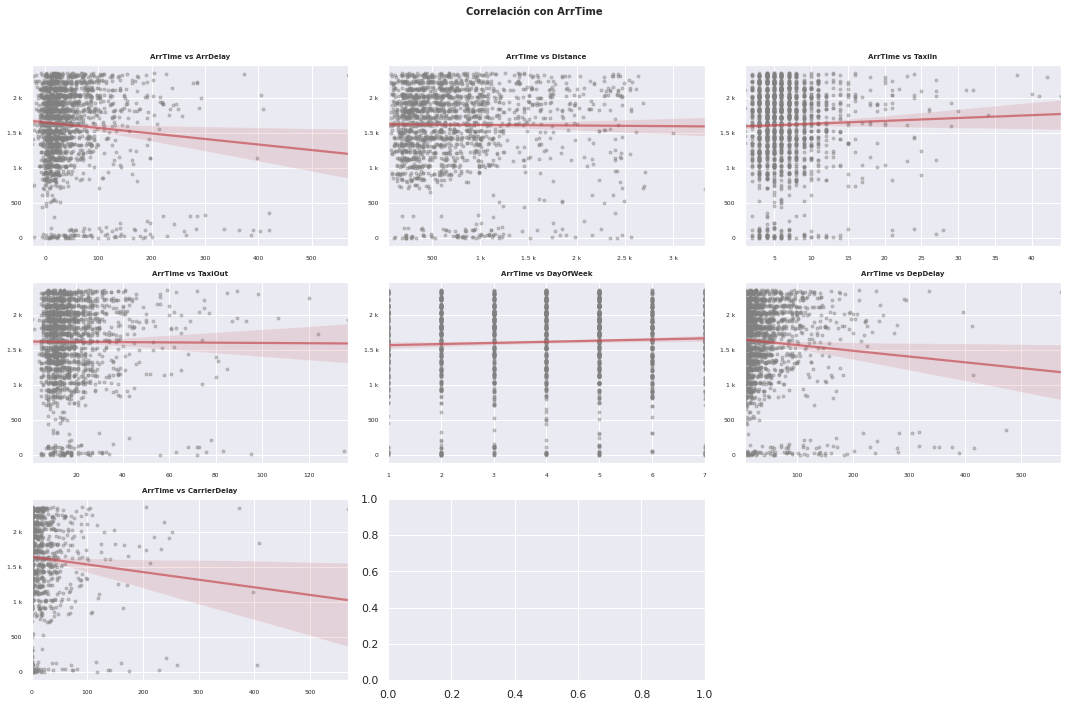

In [15]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrTime'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con ArrTime', fontsize = 10, fontweight = "bold")

## Numerical variables correlation

In [16]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
48,DepDelay,ArrDelay,0.959996,0.959996
6,ArrDelay,DepDelay,0.959996,0.959996
62,CarrierDelay,DepDelay,0.481901,0.481901
55,DepDelay,CarrierDelay,0.481901,0.481901
7,ArrDelay,CarrierDelay,0.451189,0.451189
56,CarrierDelay,ArrDelay,0.451189,0.451189
32,TaxiOut,ArrDelay,0.240119,0.240119
4,ArrDelay,TaxiOut,0.240119,0.240119
3,ArrDelay,TaxiIn,0.130539,0.130539
24,TaxiIn,ArrDelay,0.130539,0.130539


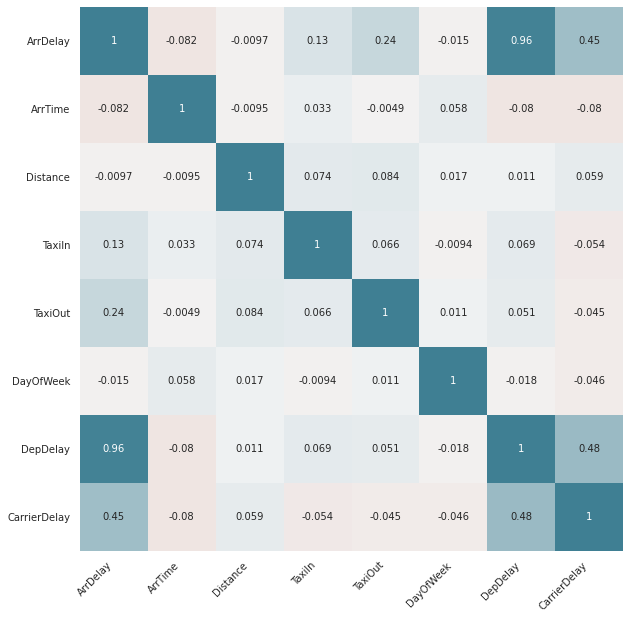

In [38]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

## Qualitative variables

In [18]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,UniqueCarrier
count,1937
unique,20
top,WN
freq,388


Text(0.5, 0.98, 'Qualitative variable distribution')

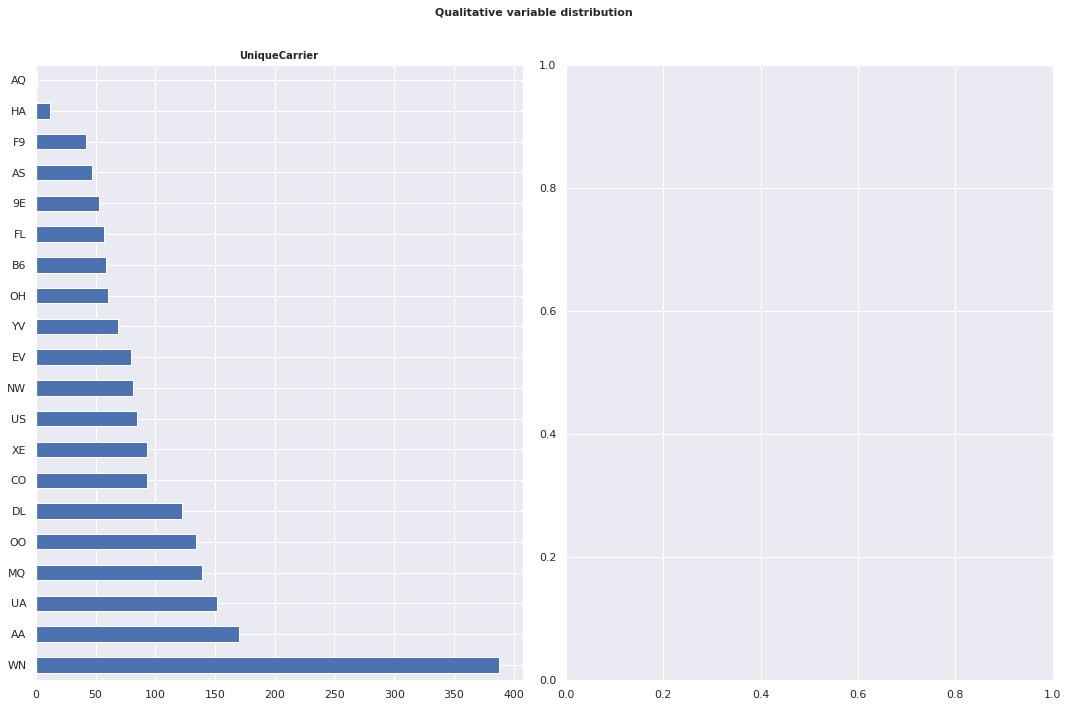

In [19]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")

Text(0.5, 0.98, 'ArrTime distribution by group')

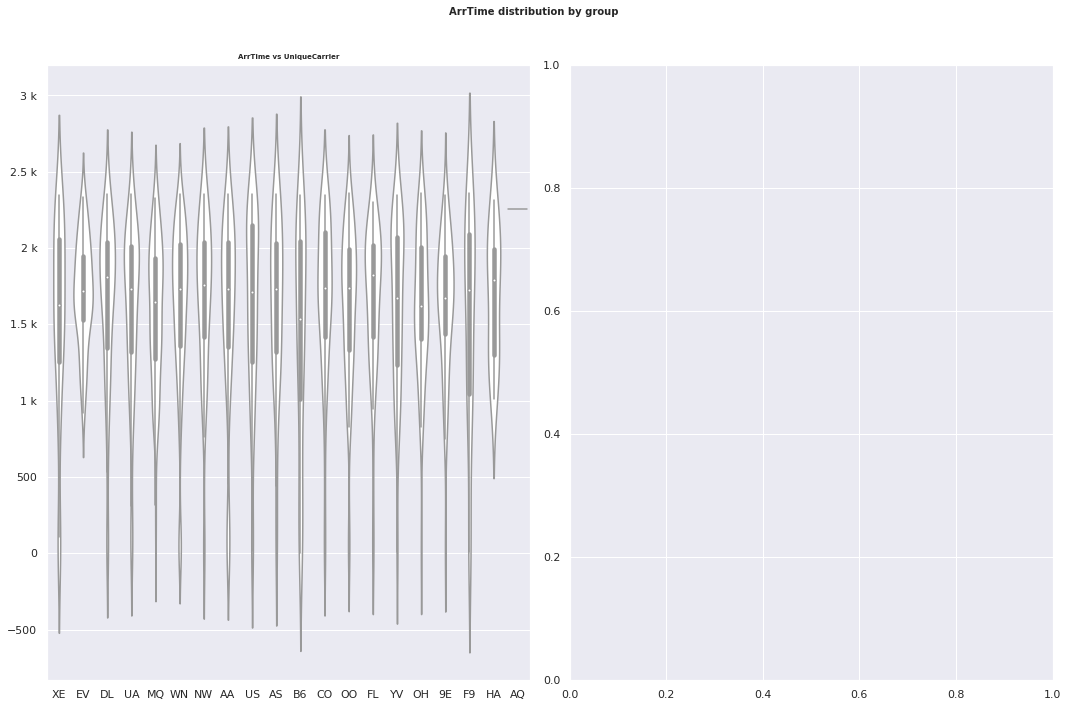

In [20]:
# Graph relationship between the price and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrTime',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrTime distribution by group', fontsize = 10, fontweight = "bold")

## Create Categorical Dummies

In [21]:
import categorical 

df = categorical.transform(df, "UniqueCarrier")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArrDelay          1931 non-null   float64
 1   ArrTime           1931 non-null   float64
 2   Distance          1937 non-null   int64  
 3   TaxiIn            1931 non-null   float64
 4   TaxiOut           1936 non-null   float64
 5   DayOfWeek         1937 non-null   int64  
 6   DepDelay          1937 non-null   float64
 7   CarrierDelay      1269 non-null   float64
 8   UniqueCarrier_9E  1937 non-null   uint8  
 9   UniqueCarrier_AA  1937 non-null   uint8  
 10  UniqueCarrier_AQ  1937 non-null   uint8  
 11  UniqueCarrier_AS  1937 non-null   uint8  
 12  UniqueCarrier_B6  1937 non-null   uint8  
 13  UniqueCarrier_CO  1937 non-null   uint8  
 14  UniqueCarrier_DL  1937 non-null   uint8  
 15  UniqueCarrier_EV  1937 non-null   uint8  
 16  UniqueCarrier_F9  1937 non-null   ui

## Imputation of missing values

In [23]:
df.isnull().sum().sum()

687

In [24]:
import missing

In [25]:
df[:] = missing.transform(df[:])

In [26]:
df.isnull().sum().sum()

0

## Identify which distribution the data best fit 

In [27]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
                  
fitter = Fitter(df.ArrTime, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
beta,0.000014,1631.204095,-36287.796917,inf
powerlaw,0.000014,1625.219274,-36250.262392,inf
logistic,0.000015,1687.053941,-36099.668529,inf
norm,0.000016,1667.226786,-36036.606048,inf
gamma,0.000016,1662.232520,-35973.267499,inf
chi2,0.000017,1665.253146,-35953.778575,inf
cauchy,0.000017,1715.340243,-35920.493406,inf
expon,0.000032,1627.457675,-34714.130214,inf
exponpow,0.000040,inf,-34260.708862,NaN


## Divide the data set into training set and test set

In [28]:
# Matrix
X = df.drop('ArrTime', axis = 'columns')
# Vector
y = df['ArrTime']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [30]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count    1549.000000
mean     1617.756015
std       554.946958
min         2.000000
25%      1333.000000
50%      1730.000000
75%      2032.000000
max      2359.000000
Name: ArrTime, dtype: float64


In [31]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count     388.000000
mean     1628.182990
std       523.598935
min         2.000000
25%      1348.750000
50%      1719.500000
75%      2025.250000
max      2354.000000
Name: ArrTime, dtype: float64


## Create a Model